<a href="https://colab.research.google.com/github/bunnybunbun37204/Titanic/blob/main/aihack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import pandas as pd
import os
import shutil
from google.colab import drive
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.getcwd()

'/content/drive/My Drive/2023 Pre Practice (Task)/Task'

In [ ]:
os.chdir('/content/drive/MyDrive/2023 Pre Practice (Task)/Task')
!ls

submission.csv	submission_sample.csv  test.csv  train.csv


In [ ]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")

# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")

# preview train data
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [ ]:
# check missing values in train data
train_df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Percent of missing "Age" records is 0.00%


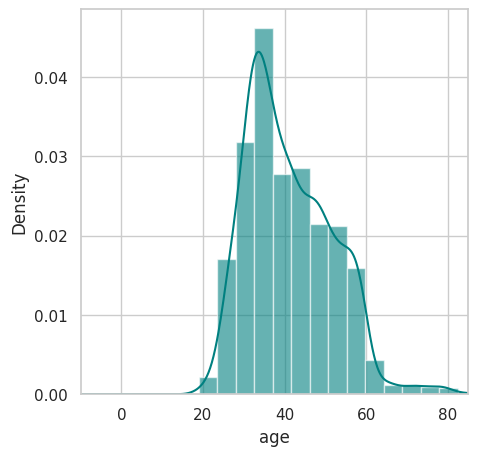

In [ ]:
# percent of missing "Age"
print('Percent of missing "Age" records is %.2f%%' %((train_df['age'].isnull().sum()/train_df.shape[0])*100))
ax = train_df["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["age"].plot(kind='density', color='teal')
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

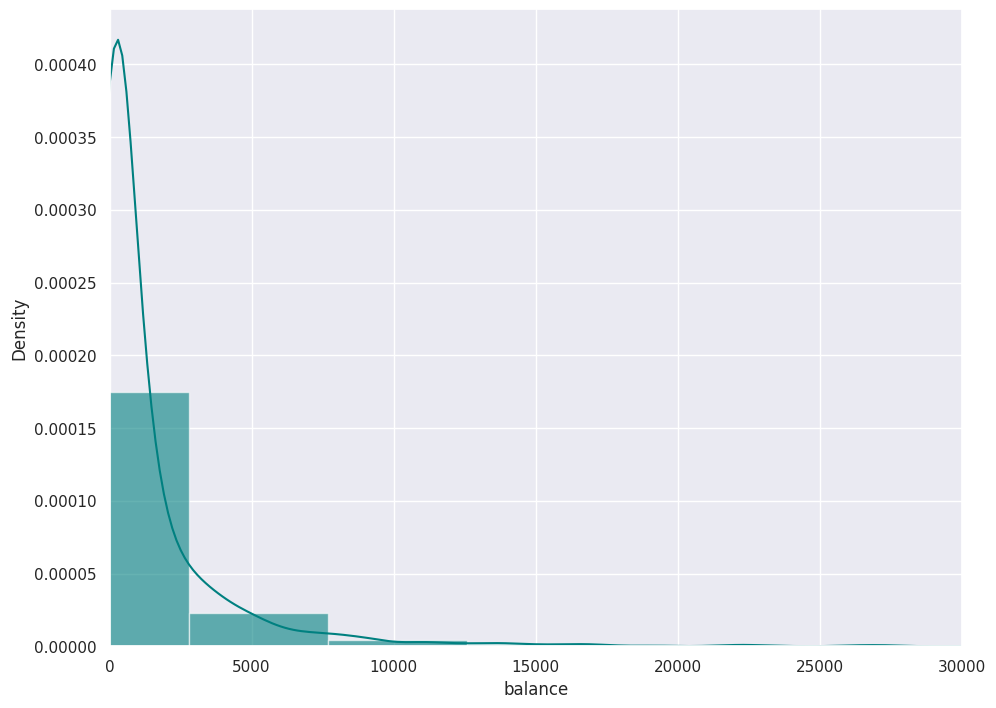

In [ ]:
# percent of missing "Age"
sns.set(rc={'figure.figsize':(11,8.27)})

ax = train_df["balance"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["balance"].plot(kind='density', color='teal')
ax.set(xlabel='balance')
plt.xlim(0,30000)
plt.show()

In [ ]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["age"].median(skipna=True)))

The mean of "Age" is 41.20
The median of "Age" is 39.00


management       871
blue-collar      829
technician       675
admin.           430
services         360
retired          205
self-employed    161
entrepreneur     150
unemployed       112
housemaid         99
student           74
unknown           33
Name: job, dtype: int64


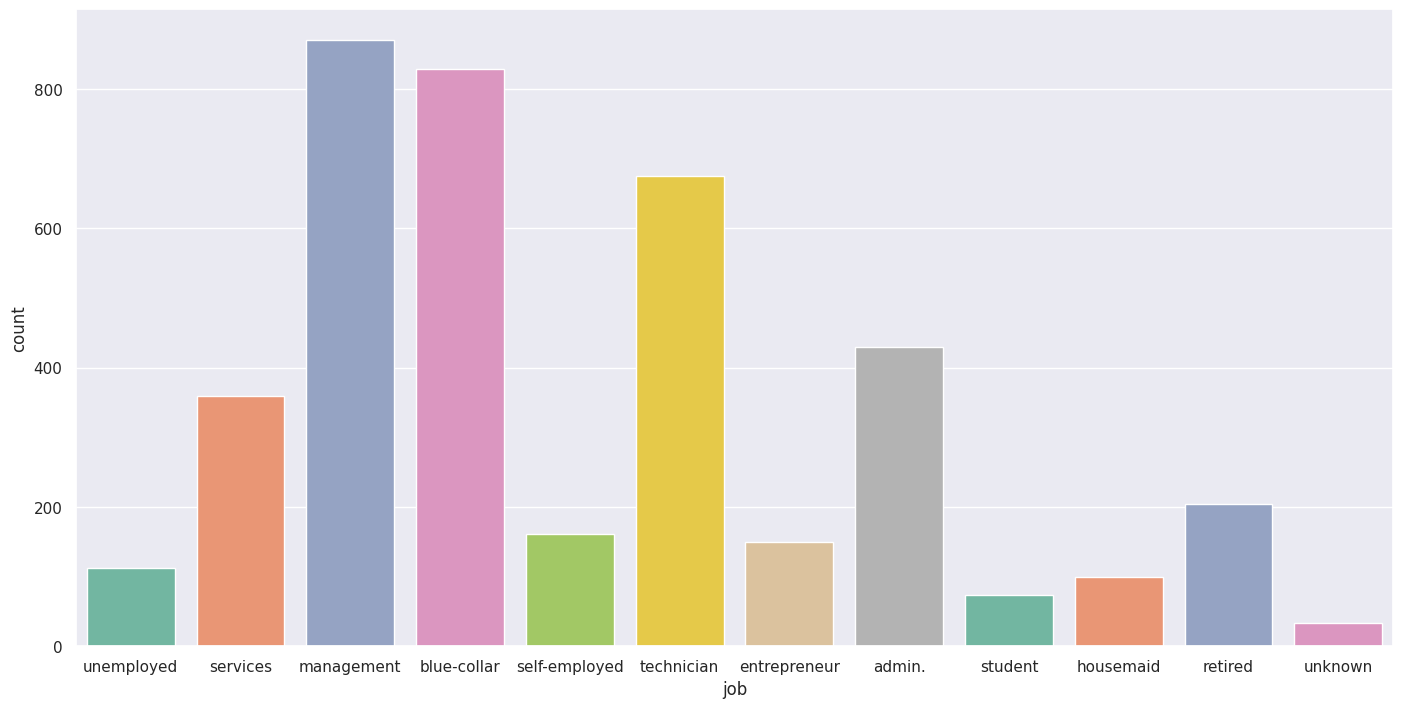

In [ ]:
sns.set(rc={'figure.figsize':(17,8.27)})

print(train_df['job'].value_counts())
sns.countplot(x='job', data=train_df, palette='Set2', )
plt.show()

married     2490
single      1054
divorced     455
Name: marital, dtype: int64


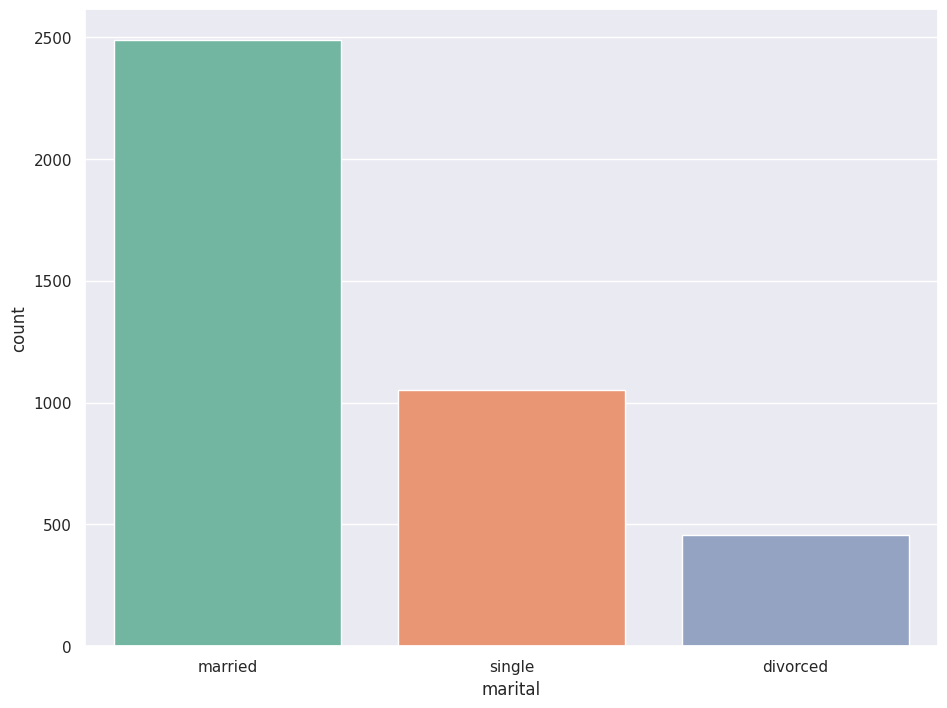

In [ ]:
sns.set(rc={'figure.figsize':(11,8.27)})

print(train_df['marital'].value_counts())
sns.countplot(x='marital', data=train_df, palette='Set2', )
plt.show()

secondary    2028
tertiary     1204
primary       602
unknown       165
Name: education, dtype: int64


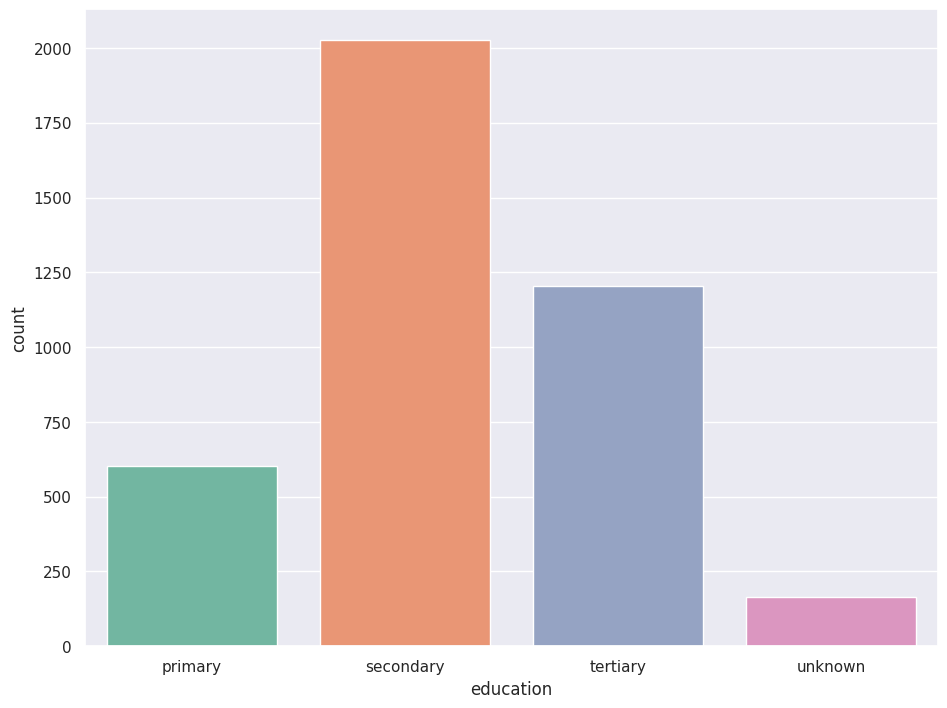

In [ ]:
sns.set(rc={'figure.figsize':(11,8.27)})

print(train_df['education'].value_counts())
sns.countplot(x='education', data=train_df, palette='Set2', )
plt.show()

yes    2262
no     1737
Name: housing, dtype: int64


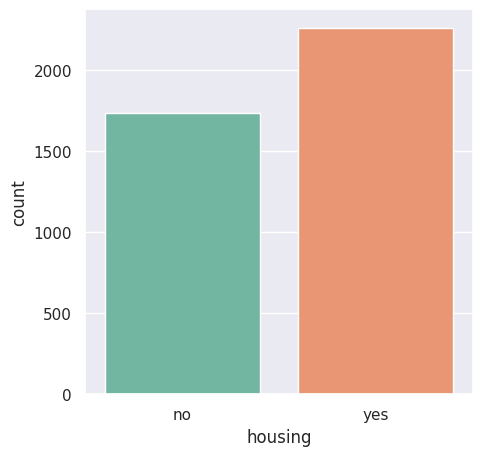

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

print(train_df['housing'].value_counts())
sns.countplot(x='housing', data=train_df, palette='Set2', )
plt.show()

no     3541
yes     458
Name: y, dtype: int64


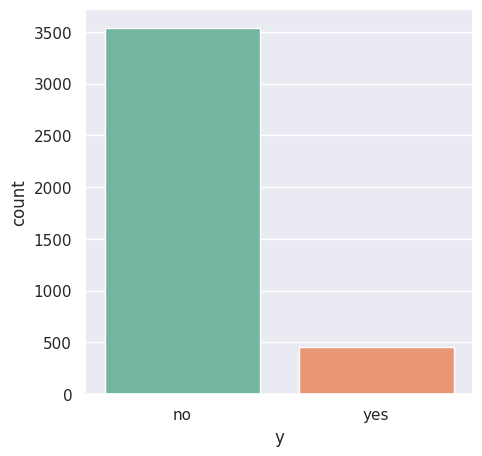

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

print(train_df['y'].value_counts())
sns.countplot(x='y', data=train_df, palette='Set2', )
plt.show()

no     3385
yes     614
Name: loan, dtype: int64


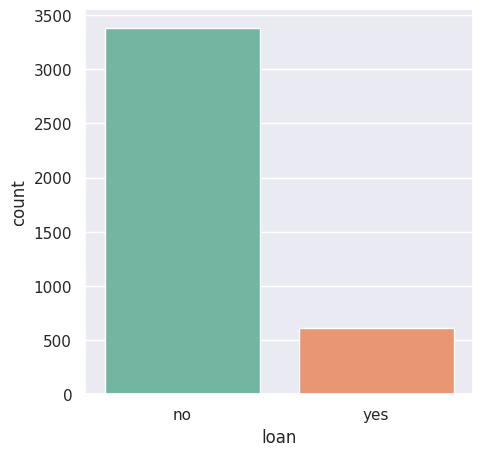

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

print(train_df['loan'].value_counts())
sns.countplot(x='loan', data=train_df, palette='Set2', )
plt.show()

no     3930
yes      69
Name: default, dtype: int64


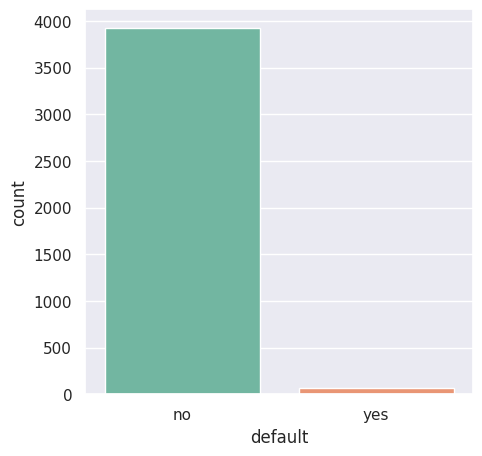

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

print(train_df['default'].value_counts())
sns.countplot(x='default', data=train_df, palette='Set2', )
plt.show()

cellular     2568
unknown      1172
telephone     259
Name: contact, dtype: int64


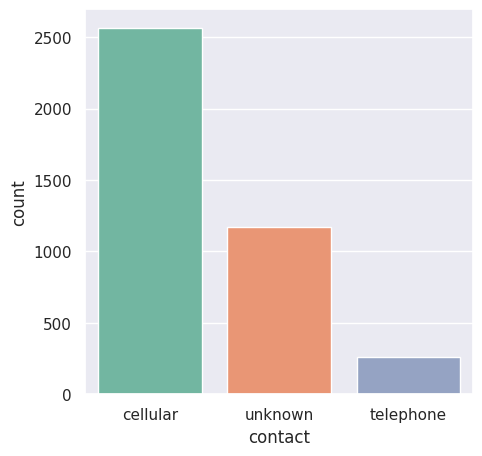

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

print(train_df['contact'].value_counts())
sns.countplot(x='contact', data=train_df, palette='Set2', )
plt.show()

In [ ]:
train_data = train_df.copy()
test_data = test_df.copy()
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


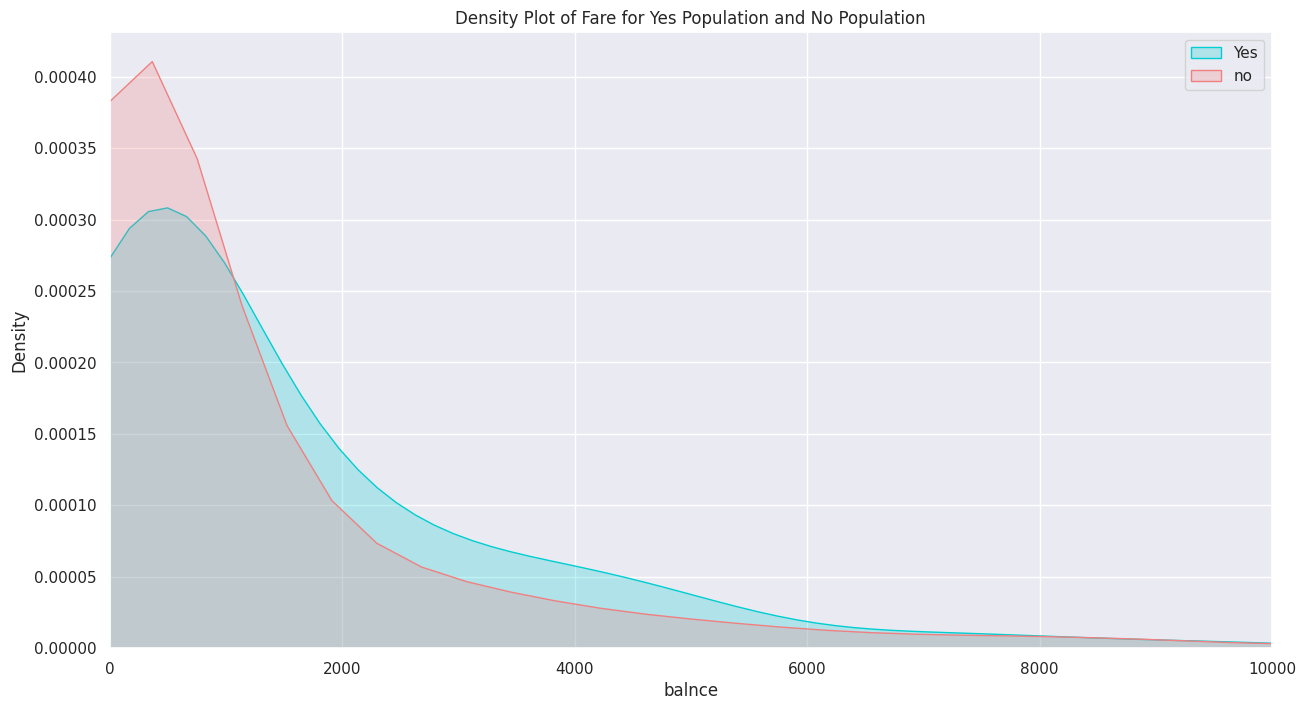

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["balance"][train_data.y == "yes"], color="darkturquoise", shade=True)
sns.kdeplot(train_data["balance"][train_data.y == "no"], color="lightcoral", shade=True)
plt.legend(['Yes', 'no'])
plt.title('Density Plot of Fare for Yes Population and No Population')
ax.set(xlabel='balnce')
plt.xlim(0,10000)
plt.show()

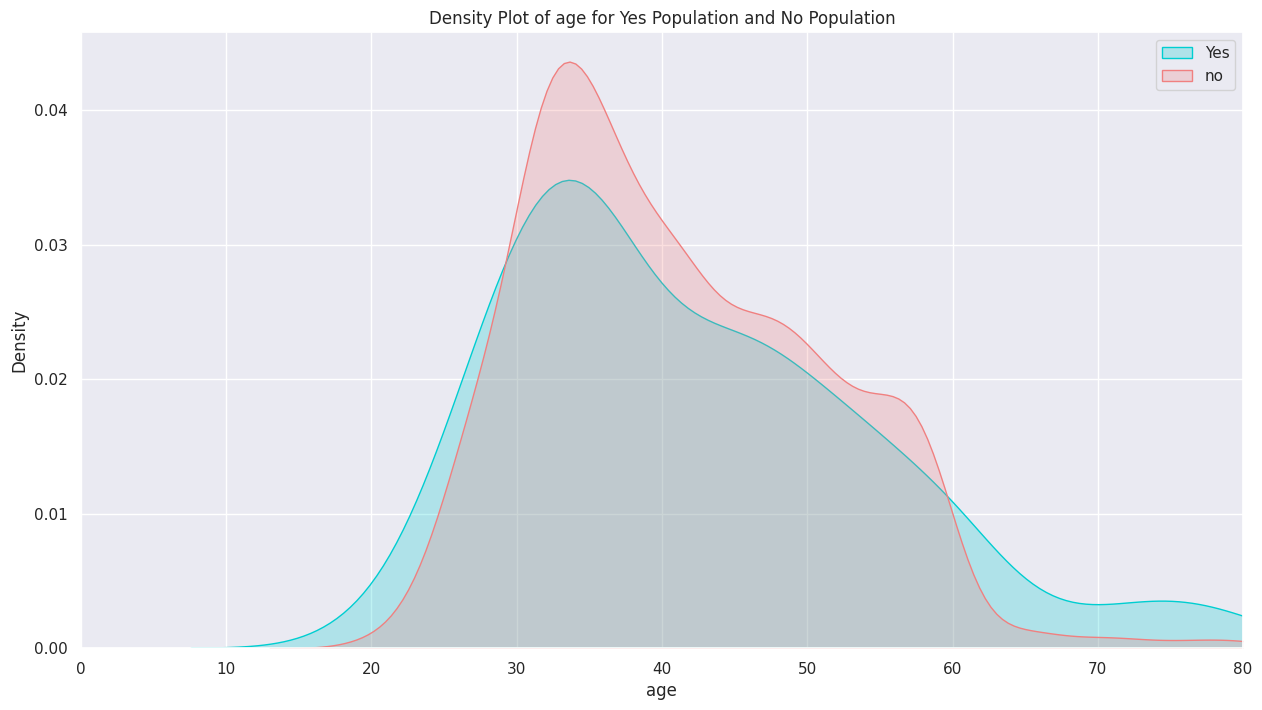

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["age"][train_data.y == "yes"], color="darkturquoise", shade=True)
sns.kdeplot(train_data["age"][train_data.y == "no"], color="lightcoral", shade=True)
plt.legend(['Yes', 'no'])
plt.title('Density Plot of age for Yes Population and No Population')
ax.set(xlabel='age')
plt.xlim(0,80)
plt.show()

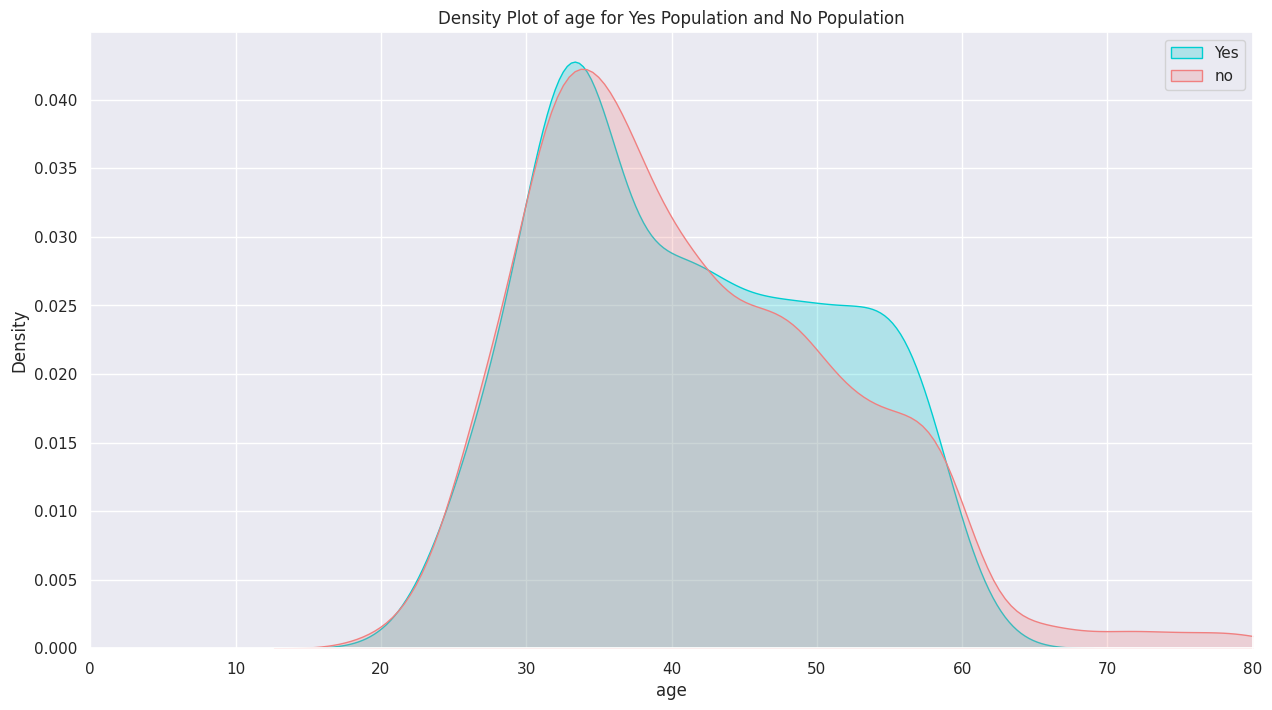

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["age"][train_data.loan == "yes"], color="darkturquoise", shade=True)
sns.kdeplot(train_data["age"][train_data.loan == "no"], color="lightcoral", shade=True)
plt.legend(['Yes', 'no'])
plt.title('Density Plot of age for Yes Population and No Population')
ax.set(xlabel='age')
plt.xlim(0,80)
plt.show()

management       121
technician        76
blue-collar       54
admin.            53
retired           45
services          36
student           17
self-employed     17
entrepreneur      12
housemaid         12
unemployed         9
unknown            6
Name: job, dtype: int64


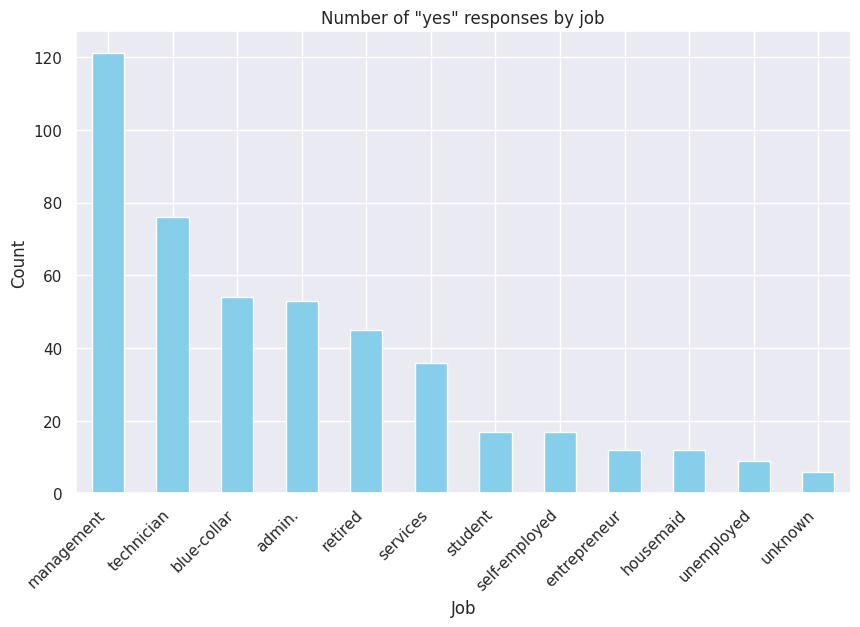

In [ ]:
# Filter the data where 'y' is 'yes'
yes_data = train_data[train_data['y'] == 'yes']

# Count the occurrences of each job in the filtered data
job_counts = yes_data['job'].value_counts()
print(job_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Number of "yes" responses by job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

blue-collar      775
management       750
technician       599
admin.           377
services         324
retired          160
self-employed    144
entrepreneur     138
unemployed       103
housemaid         87
student           57
unknown           27
Name: job, dtype: int64


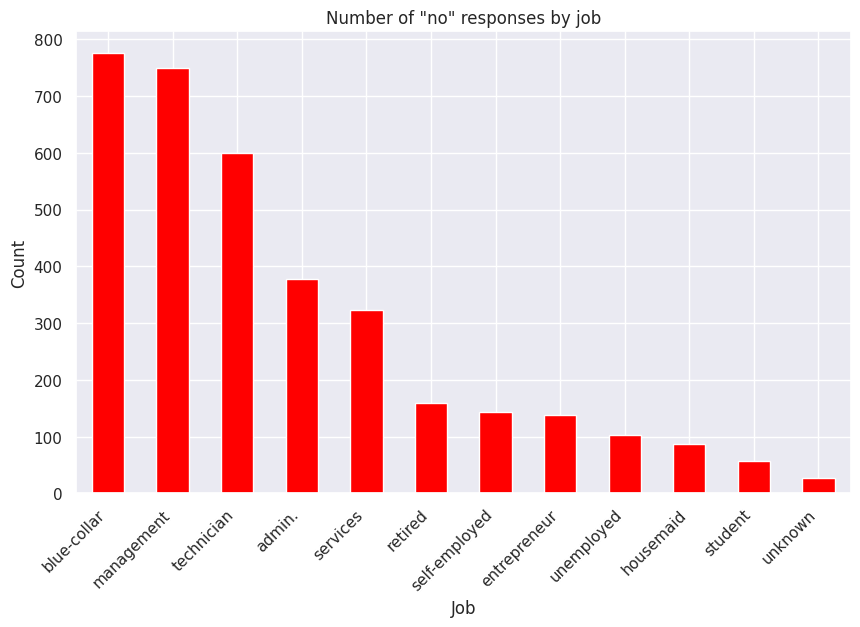

In [ ]:
# Filter the data where 'y' is 'yes'
yes_data = train_data[train_data['y'] == 'no']

# Count the occurrences of each job in the filtered data
job_counts = yes_data['job'].value_counts()
print(job_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='red')
plt.title('Number of "no" responses by job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

secondary    213
tertiary     178
primary       54
unknown       13
Name: education, dtype: int64


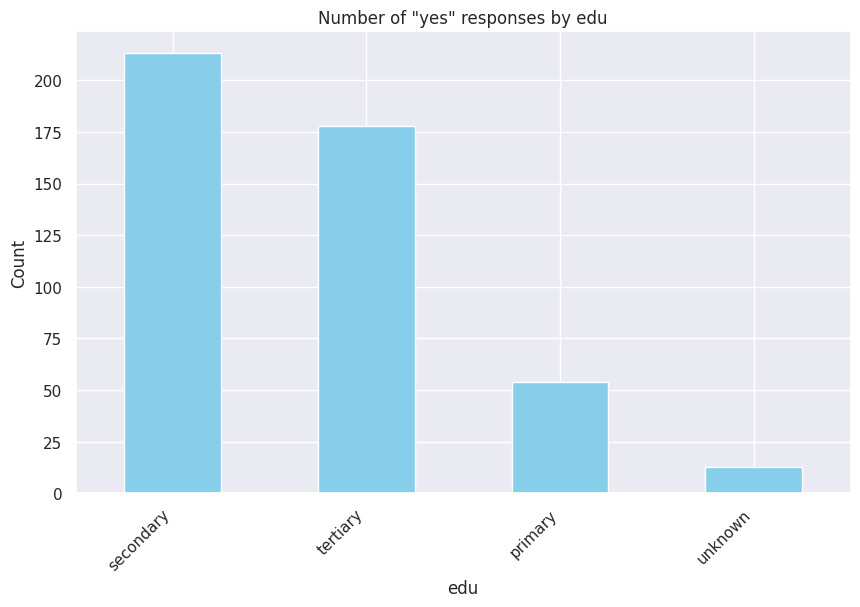

In [ ]:
# Filter the data where 'y' is 'yes'
yes_data = train_data[train_data['y'] == 'yes']

# Count the occurrences of each job in the filtered data
job_counts = yes_data['education'].value_counts()
print(job_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Number of "yes" responses by edu')
plt.xlabel('edu')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

may    79
aug    74
jul    52
apr    47
jun    47
nov    36
feb    36
oct    31
mar    19
jan    15
sep    14
dec     8
Name: month, dtype: int64


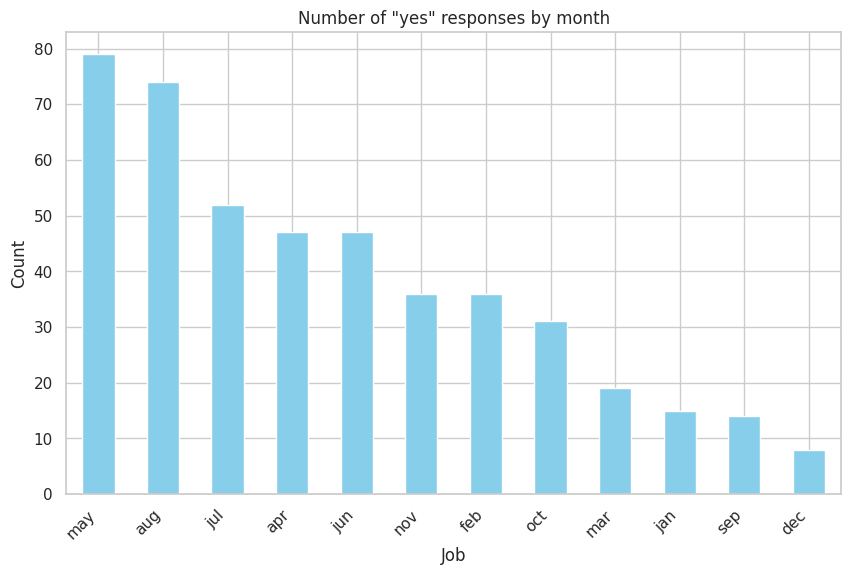

In [115]:
# Filter the data where 'y' is 'yes'
yes_data = train_data[train_data['y'] == 'yes']

# Count the occurrences of each job in the filtered data
job_counts = yes_data['month'].value_counts()
print(job_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
job_counts.plot(kind='bar', color='skyblue')
plt.title('Number of "yes" responses by month')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

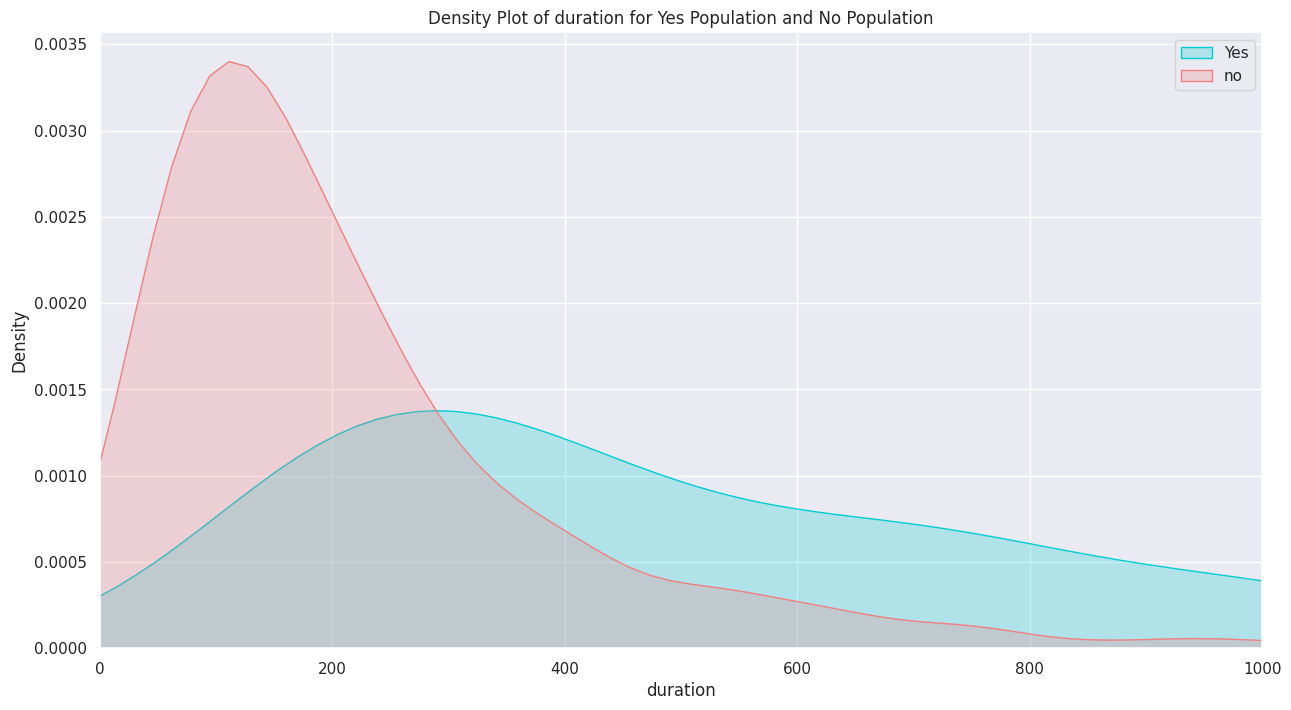

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_data["duration"][train_data.y == "yes"], color="darkturquoise", shade=True)
sns.kdeplot(train_data["duration"][train_data.y == "no"], color="lightcoral", shade=True)
plt.legend(['Yes', 'no'])
plt.title('Density Plot of duration for Yes Population and No Population')
ax.set(xlabel='duration')
plt.xlim(0,1000)
plt.show()

In [ ]:
train_data.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [118]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["job","marital","education", "housing","loan", "month"])
training.drop('id', axis=1, inplace=True)
training.drop('default', axis=1, inplace=True)
training.drop('housing_no', axis=1, inplace=True)
training.drop('loan_no', axis=1, inplace=True)
training.drop('contact', axis=1, inplace=True)


final_train = training
final_train.head()

,age,balance,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,1787,79,1,-1,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,1,339,4,failure,no,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,1350,185,1,330,1,failure,no,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,unknown,no,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,226,1,-1,0,unknown,no,0,1,...,0,0,0,0,0,0,1,0,0,0


In [117]:
#create categorical variables and drop some variables
testing=pd.get_dummies(test_data, columns=["job","marital","education", "housing","loan", "month"])
testing.drop('id', axis=1, inplace=True)
testing.drop('default', axis=1, inplace=True)
testing.drop('housing_no', axis=1, inplace=True)
testing.drop('loan_no', axis=1, inplace=True)
testing.drop('contact', axis=1, inplace=True)


final_test = testing
final_test.head()

,age,balance,duration,campaign,pdays,previous,poutcome,y,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,44,27,485,1,-1,0,unknown,no,0,0,...,0,0,0,0,0,0,1,0,0,0
1,53,26,56,1,359,1,failure,no,1,0,...,0,0,0,0,0,0,1,0,0,0
2,36,191,69,1,-1,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,-123,131,2,-1,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,-147,95,2,-1,0,unknown,no,0,0,...,0,0,0,0,1,0,0,0,0,0


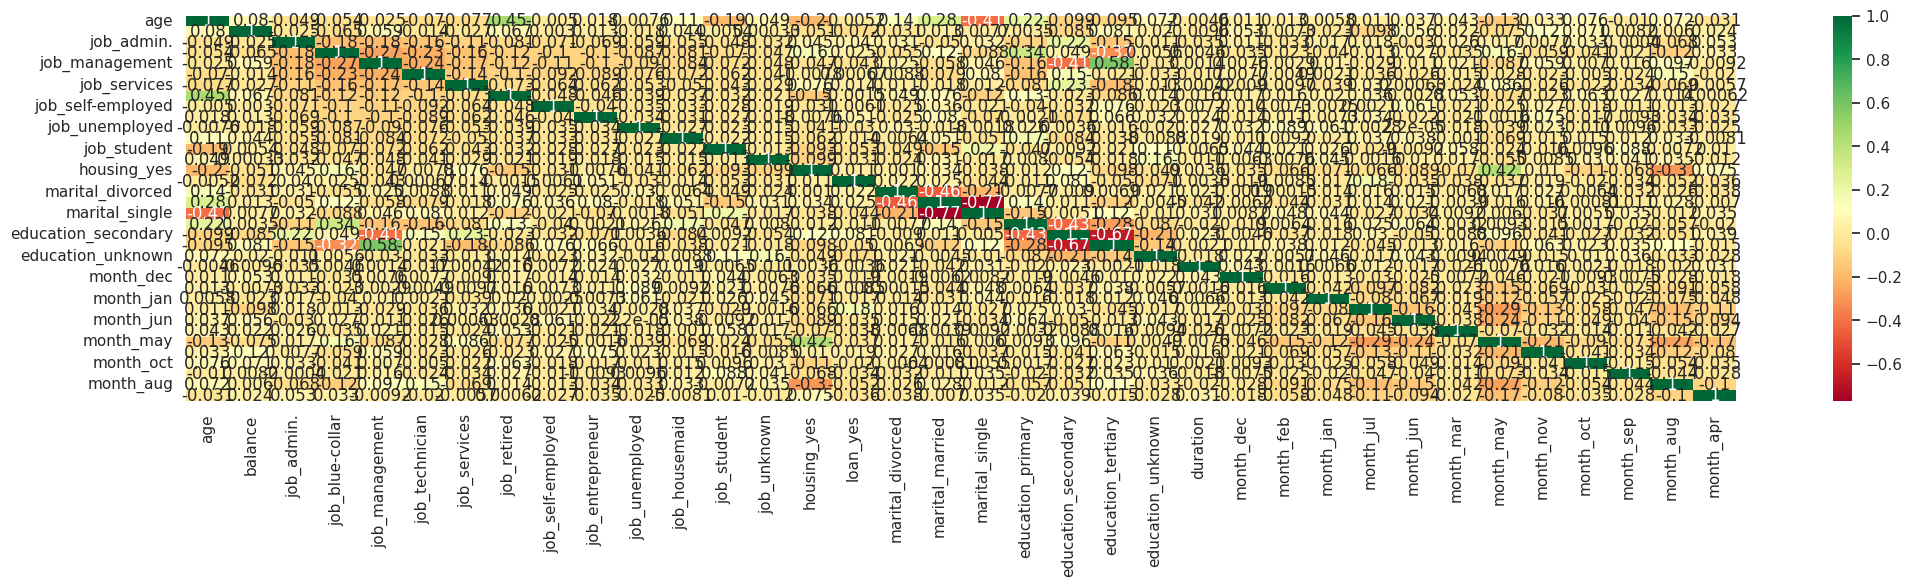

In [119]:
"""
blue-collar      775
management       750
technician       599
admin.           377
services         324
retired          160
self-employed    144
entrepreneur     138
unemployed       103
housemaid         87
student           57
unknown           27
"""
Selected_features = ['age',"balance", 'job_admin.', 'job_blue-collar', 'job_management','job_technician','job_services','job_retired',
                     'job_self-employed','job_entrepreneur','job_unemployed','job_housemaid','job_student','job_unknown',
                     'housing_yes','loan_yes', 'marital_divorced','marital_married','marital_single','education_primary',
                     'education_secondary','education_tertiary','education_unknown','duration', "month_dec",
                     "month_feb",	"month_jan",	"month_jul",	"month_jun",	"month_mar",	"month_may",	"month_nov",	"month_oct",
                     "month_sep", "month_aug", "month_apr"]

X = final_train[Selected_features]

plt.subplots(figsize=(25, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

Train/Test split results:
LogisticRegression accuracy is 0.895
LogisticRegression log_loss is 0.260
LogisticRegression auc is 0.874


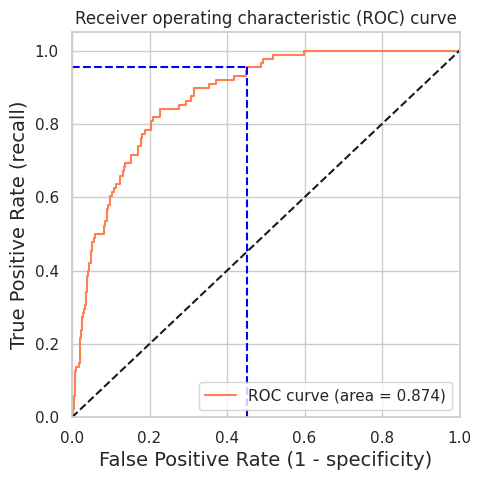

Using a threshold of 0.060 guarantees a sensitivity of 0.955 and a specificity of 0.548, i.e. a false positive rate of 45.22%.


In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.linear_model import LogisticRegression

final_train['y'] = final_train['y'].map({'yes': 1, 'no': 0})
final_test['y'] = final_test['y'].map({'yes': 1, 'no': 0})


# # create X (features) and y (response)
# X = final_train[Selected_features]
# y = final_train['y']

# # use train/test split with different random_state values
# # we can change the random_state values that changes the accuracy scores
# # the scores change a lot, this is why testing scores is a high-variance estimate
# X_train = X
# X_test = final_test[Selected_features]
# y_train = y
# y_test = final_test["y"]

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['y']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) +
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [123]:
# final_test['y'] = logreg.predict_proba(final_test[Selected_features])[:, 1]
final_test['y'] = logreg.predict_proba(final_test[Selected_features])[:, 1]

final_test['id'] = test_df['id']

submission = final_test[['id','y']]

submission.to_csv("submission.csv", index=False)

submission.head()

,id,y
0,4000,0.141599
1,4001,0.045808
2,4002,0.044219
3,4003,0.083541
4,4004,0.084892


In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.885
LogisticRegression average log_loss is 0.349
LogisticRegression average auc is 0.617


In [ ]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.885 (+/-0.001)
LogisticRegression average log_loss: 0.349 (+/-0.010)
LogisticRegression average auc: 0.617 (+/-0.043)


best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 0.8854718045112782


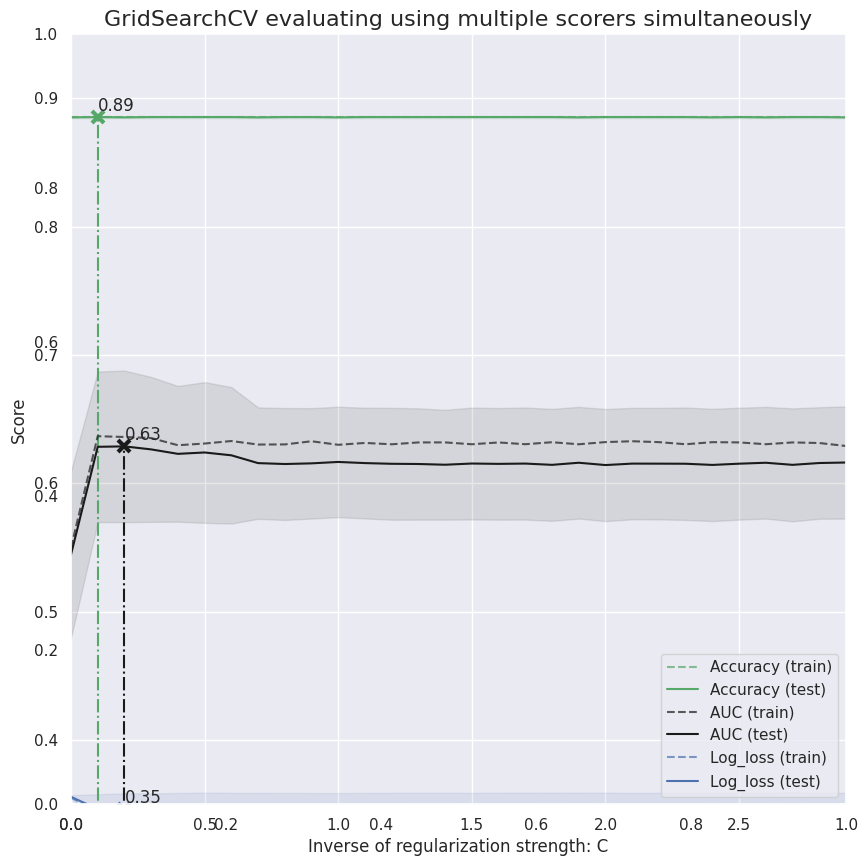

In [ ]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=3.3000100000000003))])
best params: {'clf__C': 3.3000100000000003}
best score: 0.8855215269086358


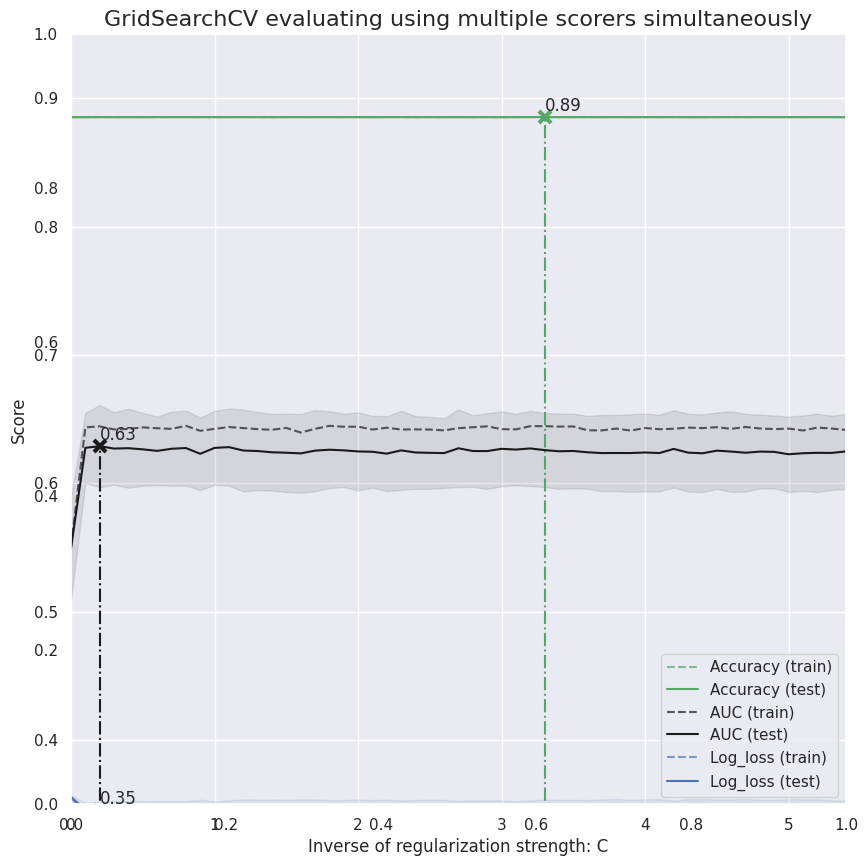

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
final_test['y'] = log_clf.predict(final_test[Selected_features])
final_test['id'] = test_df['id']

submission = final_test[['id','y']]

submission.to_csv("submission.csv", index=False)

submission.head()

,id,y
0,4000,0
1,4001,0
2,4002,0
3,4003,0
4,4004,0
